In [1]:
%%capture
!pip install pyreadstat

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import date, timedelta

import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning) 

In [3]:
df = pd.read_spss("Data.sav")

In [4]:
df['Baseline'] = pd.to_datetime(df['Baseline'])
df['Follow_up'] = pd.to_datetime(df['Follow_up'])
df['PrePost_new'] = df['PrePost_new'].replace({'Pre-COVID':0, 'Post-COVID':1})

#pre-COVID cohort
pre_start_t0 = df[df['PrePost_new']==0]['Baseline'].min()
pre_start_t1 = df[df['PrePost_new']==0]['Follow_up'].min()
pre_duration_t0 = df[df['PrePost_new']==0]['Baseline'].max() - df[df['PrePost_new']==0]['Baseline'].min()
pre_duration_t1 = df[df['PrePost_new']==0]['Follow_up'].max() - df[df['PrePost_new']==0]['Follow_up'].min()

#post-COVID cohort
post_start_t0 = df[df['PrePost_new']==1]['Baseline'].min()
post_start_t1 = df[df['PrePost_new']==1]['Follow_up'].min()
post_duration_t0 = df[df['PrePost_new']==1]['Baseline'].max() - df[df['PrePost_new']==1]['Baseline'].min()
post_duration_t1 = df[df['PrePost_new']==1]['Follow_up'].max() - df[df['PrePost_new']==1]['Follow_up'].min()

#stay-at-home order and limited bar space
stay_at_home_start = date(2020,3,21)
stay_at_home_end = date(2020,5,29)
stay_at_home_duration = stay_at_home_end - stay_at_home_start

limited_bar_end = date(2021,6,11)
limited_bar_duration = limited_bar_end - stay_at_home_end

TypeError: Addition/subtraction of integers and integer-arrays with Timestamp is no longer supported.  Instead of adding/subtracting `n`, use `n * obj.freq`

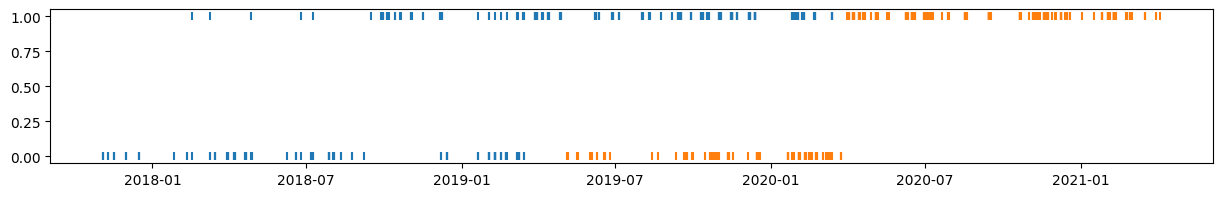

In [5]:
fig, ax = plt.subplots(figsize=(15,2))
ax.scatter(df['Baseline'], df['PrePost_new'], marker="|")
ax.scatter(df['Follow_up'], df['PrePost_new'], marker="|")

ax.broken_barh([(pre_start_t0, pre_duration_t0.days)], (0.05, 0.3), facecolors='lightblue')
ax.broken_barh([(pre_start_t1, pre_duration_t1.days)], (0.05, 0.3), facecolors='moccasin')


ax.broken_barh([(post_start_t0, post_duration_t0.days)], (0.65, 0.3), facecolors='lightblue')
ax.broken_barh([(post_start_t1, post_duration_t1.days)], (0.65, 0.3), facecolors='moccasin')

ax.broken_barh([(stay_at_home_start, stay_at_home_duration.days)], (0.4, 0.2), facecolors='thistle')
ax.broken_barh([(stay_at_home_end, limited_bar_duration.days)], (0.4, 0.2), facecolors='lavender')

ax.text(pre_start_t0, 0.10, '                                         Baseline:\n                    From 2017-11-04 to 2019-03-16', style='oblique')
ax.text(pre_start_t1, 0.10, '                      Follow-up:\n     From 2019-05-06 to 2020-03-24', style='oblique')

ax.text(post_start_t0, 0.70, '                                                              Baseline:\n                                               From 2018-02-17 to 2020-03-13', style='oblique')
ax.text(post_start_t1, 0.70, '                          Follow-up:\n          From 2020-03-31 to 2021-04-05', style='oblique')

ax.text(stay_at_home_start, 0.4, 'stay-at-home\norders', size=8, style='oblique')
ax.text(stay_at_home_end, 0.5, '        limited bar/restaurant capacities', style='oblique')

ax.axvline(x = date(2020, 3, 13), color = 'red', linestyle = '--', alpha = 0.5)


ax.annotate('2020-03-13\nNational Emergency declared by the U.S. President\nconcerning the Novel Coronavirus Disease Outbreak', 
            xy=(date(2020, 3, 13), 0), xytext=(date(2020, 3, 13),-0.6),
            color='black',
            horizontalalignment="center",
            arrowprops=dict(facecolor='black', shrink=0.05))

plt.yticks([0, 0.5, 1], ['Pre-pandemic\nCohort', 'Major COVID-related Policies\nin Illinois', 'Post-pandemic\nCohort']) 

plt.savefig("figure1.svg", format="svg", bbox_inches = 'tight', dpi=1800)
plt.show()